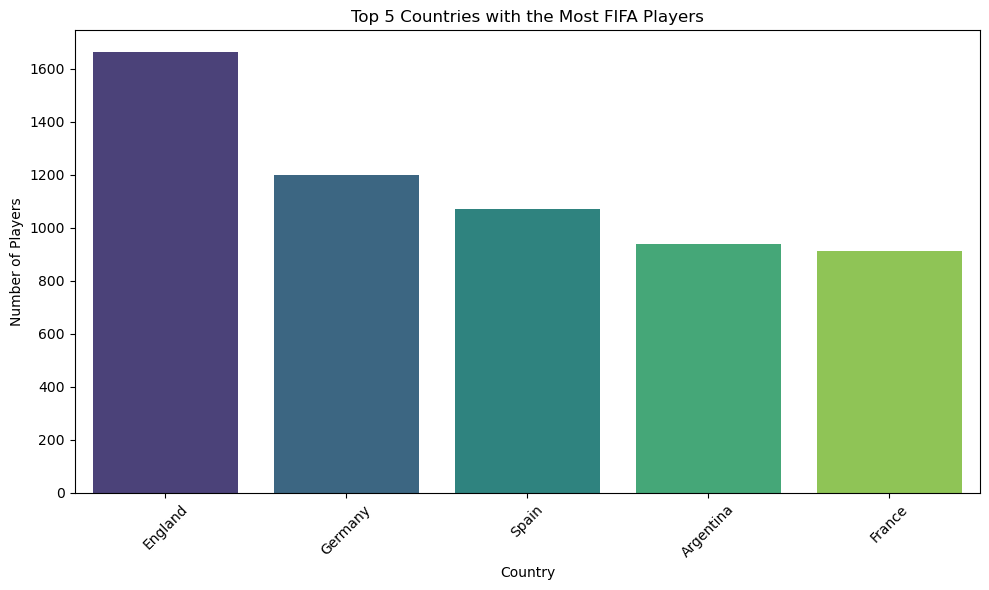

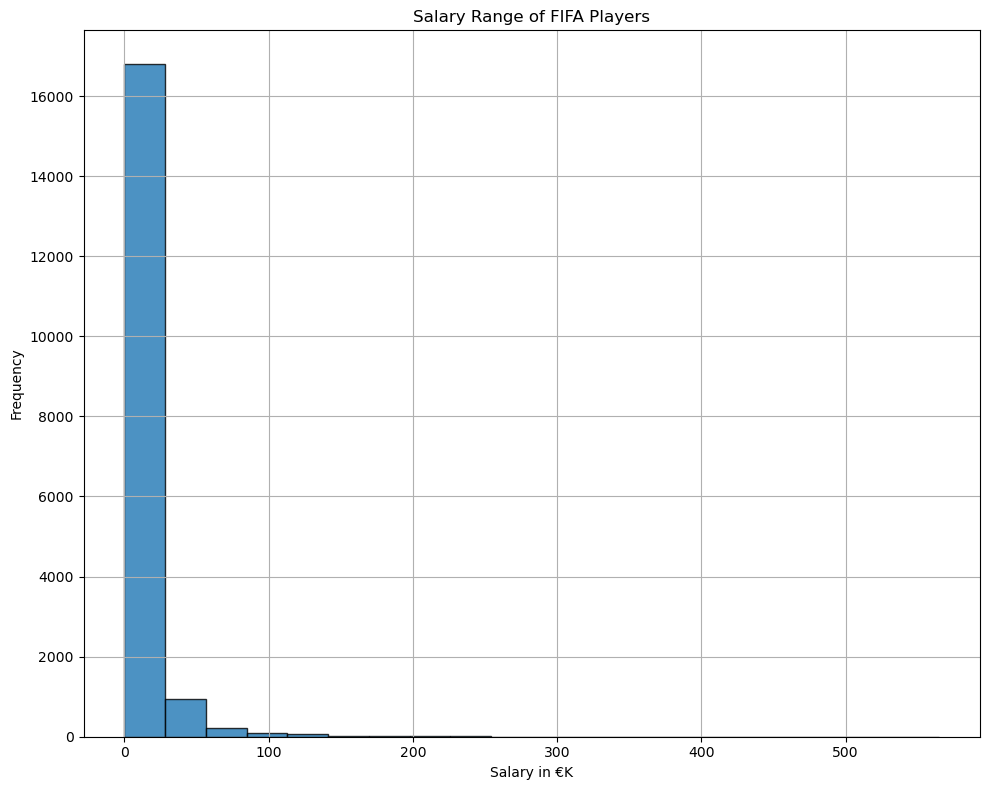

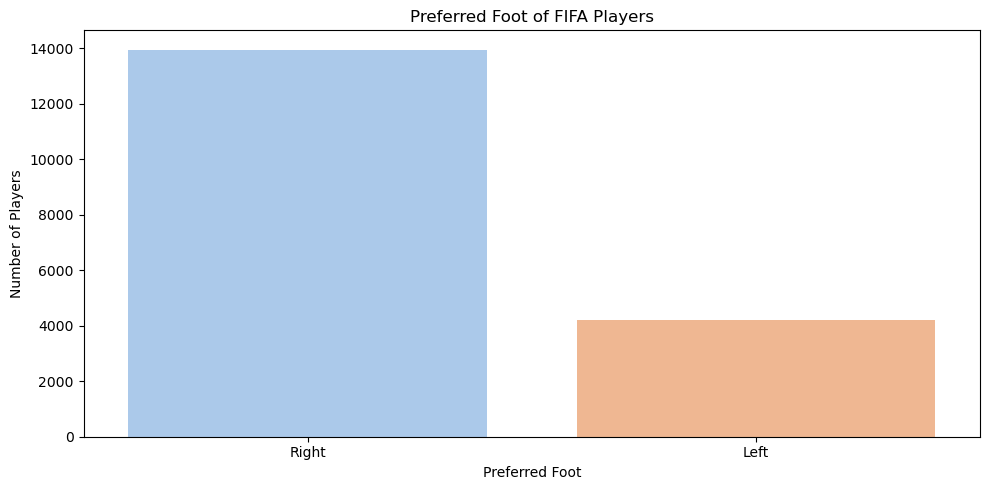


1. Country with the most players: England (1662 players)
   Insights: England has the highest number of players in FIFA, indicating a strong presence in the football world.

2. Top 5 Countries with the Most FIFA Players:
   Insights: Besides England, other top countries include Germany, Spain, Argentina, France, reflecting their strong football traditions.

3. Player with the highest salary: L. Messi (€565.0K)
   Insights: L. Messi, known for his exceptional skills, commands the highest salary, reflecting his status in the football world.

4. Salary Range of FIFA Players:
   Insights: The histogram shows a right-skewed distribution, with most players having salaries in the lower ranges, typical of football economics.

5. Tallest player in FIFA: T. Holý (205.74 cm)
   Insights: T. Holý stands out as the tallest player, highlighting diversity in player physical attributes.

6. Club with the most players: FC Barcelona (33 players)
   Insights: FC Barcelona has the most players in FIFA, p

In [37]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

# File path to your dataset
file_path = r'C:/Users/User/Desktop/AZEEZ/ENTRI/Dataset/fifa_data.csv'
df = pd.read_csv(file_path)

# Ensure we use the correct column names
salary_column = 'Wage'
player_name_column = 'Name'
height_column = 'Height'
country_column = 'Nationality'
club_column = 'Club'
preferred_foot_column = 'Preferred Foot'

# 1. Which country has the most number of players?
country_counts = df[country_column].value_counts()
most_players_country = country_counts.idxmax()

# 2. Plot a bar chart of the top 5 countries with the most number of players.
top_countries = country_counts.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 5 Countries with the Most FIFA Players')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Which player has the highest salary?
# Convert salary to numeric by removing '€' and 'K' and then converting to float
df[salary_column] = df[salary_column].replace({'€': '', 'K': ''}, regex=True).astype(float)
highest_salary_player = df.loc[df[salary_column].idxmax(), player_name_column]
highest_salary = df[salary_column].max()

# 4. Plot a histogram to get the salary range of the players.
plt.figure(figsize=(10, 8))
plt.hist(df[salary_column], bins=20, edgecolor='black', alpha=0.8)
plt.title('Salary Range of FIFA Players')
plt.xlabel('Salary in €K')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5. Who is the tallest player in FIFA?
# Convert height to numeric by converting the format '5'7"' to centimeters
def convert_height_to_cm(height_str):
    if pd.isna(height_str):
        return np.nan
    match = re.match(r"(\d+)'(\d+)", height_str)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        total_inches = feet * 12 + inches
        return total_inches * 2.54  # Convert to cm
    return np.nan

df[height_column] = df[height_column].apply(convert_height_to_cm)
tallest_player = df.loc[df[height_column].idxmax(), player_name_column]
max_height = df[height_column].max()

# 6. Which club has the most number of players?
club_counts = df[club_column].value_counts()
most_players_club = club_counts.idxmax()

# 7. Which foot is most preferred by the players? Draw a bar chart for preferred foot.
foot_counts = df[preferred_foot_column].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=foot_counts.index, y=foot_counts.values, palette="pastel")
plt.title('Preferred Foot of FIFA Players')
plt.xlabel('Preferred Foot')
plt.ylabel('Number of Players')
plt.tight_layout()
plt.show()

# Data Story and Insights
data_story = f"""
1. Country with the most players: {most_players_country} ({country_counts.max()} players)
   Insights: {most_players_country} has the highest number of players in FIFA, indicating a strong presence in the football world.

2. Top 5 Countries with the Most FIFA Players:
   Insights: Besides {most_players_country}, other top countries include {top_countries.index[1]}, {top_countries.index[2]}, {top_countries.index[3]}, {top_countries.index[4]}, reflecting their strong football traditions.

3. Player with the highest salary: {highest_salary_player} (€{highest_salary}K)
   Insights: {highest_salary_player}, known for his exceptional skills, commands the highest salary, reflecting his status in the football world.

4. Salary Range of FIFA Players:
   Insights: The histogram shows a right-skewed distribution, with most players having salaries in the lower ranges, typical of football economics.

5. Tallest player in FIFA: {tallest_player} ({max_height} cm)
   Insights: {tallest_player} stands out as the tallest player, highlighting diversity in player physical attributes.

6. Club with the most players: {most_players_club} ({club_counts.max()} players)
   Insights: {most_players_club} has the most players in FIFA, possibly due to its extensive scouting network or youth development programs.

7. Preferred Foot of FIFA Players:
   Insights: Most players prefer their right foot, which aligns with global statistics on handedness and footedness.

Overall, the analysis provides insights into player demographics, financial aspects, physical attributes, and player preferences in FIFA.
"""

print(data_story)
